In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect, MetaData, Table


In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [12]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
session.query(Measurement.station).all()

[('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC005193

In [ ]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [23]:
session.query(Measurement.date).all()

[('2010-01-01',),
 ('2010-01-02',),
 ('2010-01-03',),
 ('2010-01-04',),
 ('2010-01-06',),
 ('2010-01-07',),
 ('2010-01-08',),
 ('2010-01-09',),
 ('2010-01-10',),
 ('2010-01-11',),
 ('2010-01-12',),
 ('2010-01-14',),
 ('2010-01-15',),
 ('2010-01-16',),
 ('2010-01-17',),
 ('2010-01-18',),
 ('2010-01-19',),
 ('2010-01-20',),
 ('2010-01-21',),
 ('2010-01-22',),
 ('2010-01-23',),
 ('2010-01-24',),
 ('2010-01-25',),
 ('2010-01-26',),
 ('2010-01-27',),
 ('2010-01-28',),
 ('2010-01-30',),
 ('2010-01-31',),
 ('2010-02-01',),
 ('2010-02-03',),
 ('2010-02-04',),
 ('2010-02-05',),
 ('2010-02-06',),
 ('2010-02-07',),
 ('2010-02-08',),
 ('2010-02-09',),
 ('2010-02-11',),
 ('2010-02-12',),
 ('2010-02-13',),
 ('2010-02-14',),
 ('2010-02-15',),
 ('2010-02-16',),
 ('2010-02-17',),
 ('2010-02-19',),
 ('2010-02-20',),
 ('2010-02-21',),
 ('2010-02-22',),
 ('2010-02-23',),
 ('2010-02-24',),
 ('2010-02-25',),
 ('2010-02-26',),
 ('2010-02-28',),
 ('2010-03-01',),
 ('2010-03-02',),
 ('2010-03-03',),
 ('2010-03

In [13]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [21]:
session.query(Station.name).all()

[('WAIKIKI 717.2, HI US',),
 ('KANEOHE 838.1, HI US',),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',),
 ('PEARL CITY, HI US',),
 ('UPPER WAHIAWA 874.3, HI US',),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',),
 ('WAIHEE 837.5, HI US',),
 ('HONOLULU OBSERVATORY 702.2, HI US',),
 ('MANOA LYON ARBO 785.2, HI US',)]

In [20]:
session.query(Station.id).all()

[(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)]

In [22]:
session.query(Station.elevation).all()

[(3.0,),
 (14.6,),
 (7.0,),
 (11.9,),
 (306.6,),
 (19.5,),
 (32.9,),
 (0.9,),
 (152.4,)]

In [25]:
session.query(Station.latitude,Station.longitude).all()

[(21.2716, -157.8168),
 (21.4234, -157.8015),
 (21.5213, -157.8374),
 (21.3934, -157.9751),
 (21.4992, -158.0111),
 (21.33556, -157.71139),
 (21.45167, -157.84888999999998),
 (21.3152, -157.9992),
 (21.3331, -157.8025)]

# Exploratory Climate Analysis

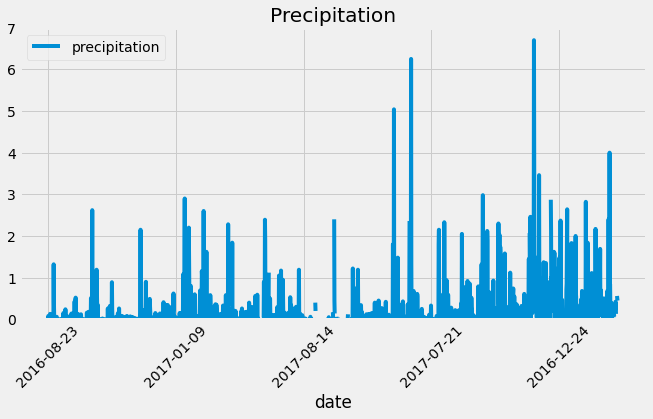

In [117]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# 9.2.1 Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days= 365)
prev_year
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
results
# 9.2.2 Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))
# Sort the dataframe by date
df.sort_index()
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10,5),ylim=(0,7),title='Precipitation',\
                  label="Precipitation",rot=45)
plt.legend(loc="upper left")

In [94]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [95]:
# 9.3.1 How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [96]:
# 9.3.2 What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [97]:
# 9.3.3 Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
                                                                                                         

[(54.0, 85.0, 71.66378066378067)]

In [98]:
# 9.3.4 Plot the Highest Number Of Observations
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)
df = pd.DataFrame(results, columns = ["tobs"])
df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


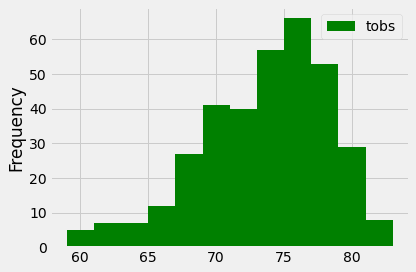

In [99]:
df.plot.hist(bins= 12, color = "green")
plt.tight_layout()

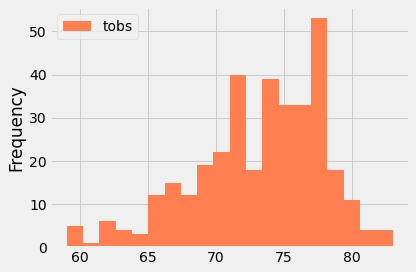

In [100]:
df.plot.hist(bins= 20, color = "coral")
plt.tight_layout()

In [82]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
start_date = input("What is the start date you would like to know? ")
end_date = input("What is the end date you would like to know? ")


What is the start date you would like to know? 2017-05-07
What is the end date you would like to know? 2017-05-17


In [107]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date == '2017-05-07').all()

[(75.0, 75.0, 75.0)]

In [115]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= ('2017-05-07')).\
filter(Measurement.date <=('2017-05-17')).all()

[(67.0, 77.0, 73.27272727272727)]

# Challenge